# Daily Report

We replicate the numbers of cases published in the daily meeting

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
%matplotlib 


Using matplotlib backend: MacOSX


In [2]:

strpath = '../src/'
m = []
if not os.path.isfile('report_data1.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
            df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
            df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
            df.FECHA_SINTOMAS = pd.to_datetime(df['FECHA_SINTOMAS'],)
            df['deltaSintomas']=df.FECHA_ACTUALIZACION1-df.FECHA_SINTOMAS 
            df['deltaSintomas'] = df.deltaSintomas.dt.days
            df.loc[df.FECHA_DEF=='9999-99-99', 'FECHA_DEF'] = '2050-12-31'
            df.FECHA_DEF = pd.to_datetime(df['FECHA_DEF'],)
            m.append([df.FECHA_ACTUALIZACION.unique()[0]
                      ,df[(df.deltaSintomas<14)& (df.RESULTADO=='1')]['ID_REGISTRO'].count()
                  ,df[df.RESULTADO=='1']['ID_REGISTRO'].count()
                  ,df[(df.FECHA_DEF!='2050-12-31')&(df.RESULTADO=='1')]['ID_REGISTRO'].count()
                  ,df[df.RESULTADO=='3']['ID_REGISTRO'].count()
                  ,df.ID_REGISTRO.nunique()
                  ,len(df[(df.deltaSintomas<14)& (df.RESULTADO=='3')])
                  ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='3')])
                  ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='2')])
                     ]
            )
    df = pd.DataFrame(m)
    df.columns = ['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra', 'activos sospechosos', 'defunciones sospechosos', 'muertos negativos']
    df = df.sort_values(by='date', ascending=False)
    df = df.reset_index(drop=True)
    df.to_csv('report_data.csv', index=False)
else:
    df0 = pd.read_csv('report_data.csv')
    df0.date = pd.to_datetime(df0['date'], format='%Y-%m-%d')
    lastdateRecord = df0.date.max()
    deltaT = datetime.datetime.now() - lastdateRecord
    for i in range(1,deltaT.days+1) :
        filename = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y%m%d")+'.csv'
        df = pd.read_csv(strpath+filename, encoding = "ISO-8859-1",dtype =str)
        df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
        df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
        df.FECHA_SINTOMAS = pd.to_datetime(df['FECHA_SINTOMAS'],)
        df['deltaSintomas']=df.FECHA_ACTUALIZACION1-df.FECHA_SINTOMAS 
        df['deltaSintomas'] = df.deltaSintomas.dt.days
        df.loc[df.FECHA_DEF=='9999-99-99', 'FECHA_DEF'] = '2050-12-31'
        df.FECHA_DEF = pd.to_datetime(df['FECHA_DEF'],)
        m.append([df.FECHA_ACTUALIZACION.unique()[0]
                  ,df[(df.deltaSintomas<14)& (df.RESULTADO=='1')]['ID_REGISTRO'].count()
              ,df[df.RESULTADO=='1']['ID_REGISTRO'].count()
              ,df[(df.FECHA_DEF!='2050-12-31')&(df.RESULTADO=='1')]['ID_REGISTRO'].count()
              ,df[df.RESULTADO=='3']['ID_REGISTRO'].count()
              ,df.ID_REGISTRO.nunique()
              ,len(df[(df.deltaSintomas<14)& (df.RESULTADO=='3')])
              ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='3')])
              ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='2')])
                 ]
        )
    df1 = pd.DataFrame(m)
    df1.columns = ['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra', 'activos sospechosos', 'defunciones sospechosos', 'muertos negativos']
    df1 = df1.sort_values(by='date', ascending=False)
    frames = [df1,df0]
    df = pd.concat(frames)
    df = df.reset_index(drop=True)
    df.to_csv('report_data.csv', index=False)

In [3]:
column = df.columns[1:]
for each in column:
    column_name = '∆ '+ each
    df[column_name] = df[each] - df[each].shift(-1)
    column_name1 = '% '+ each
    df[column_name1] = (df[column_name]/ df[column_name].shift(-1))*100

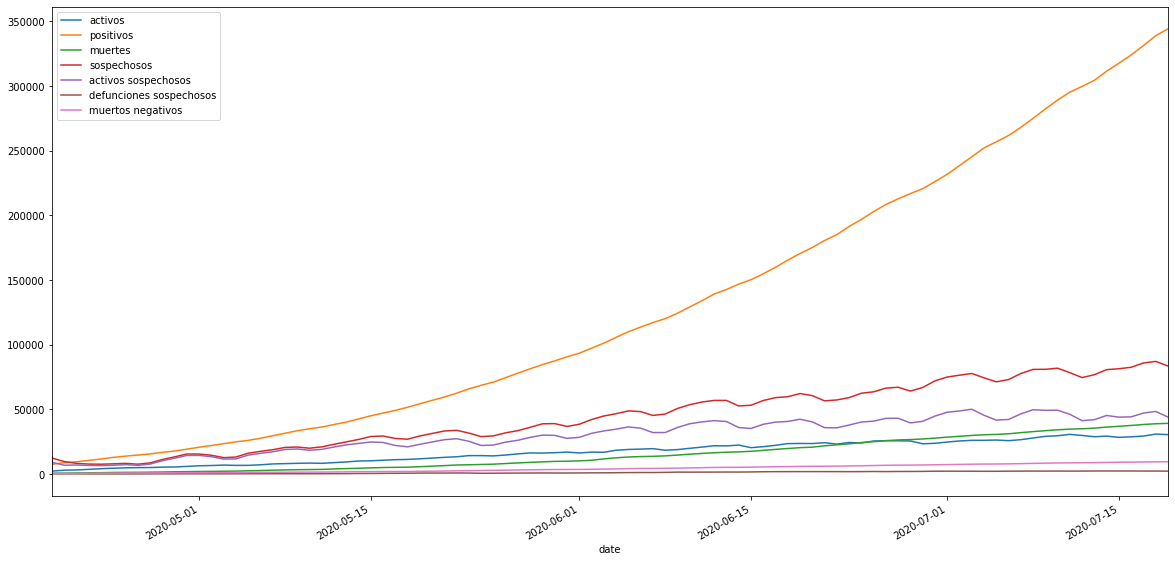

In [4]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

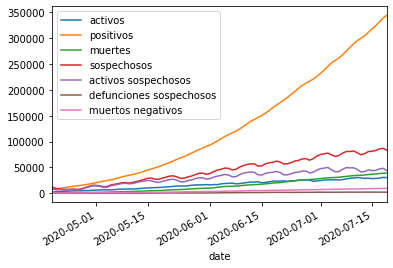

In [6]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot()

In [7]:
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-07-19,30478,344224,39184,83542,821922,44081,2245,9535
1,2020-07-18,30896,338913,38888,87104,814653,48380,2305,9461
2,2020-07-17,29363,331298,38310,85877,799178,47156,2315,9343
3,2020-07-16,28786,324041,37574,82567,782063,44224,2364,9222
4,2020-07-15,28361,317635,36906,81411,768457,43989,2348,9105
5,2020-07-14,29329,311486,36327,80721,756137,45272,2373,8980
6,2020-07-13,28843,304435,35491,76824,739922,42047,2363,8834


In [8]:
print("Activos %i. ∆ %i. "%(df.loc[0]['activos'], df.loc[0]['∆ activos'],))
print("Positivos %i. ∆ %i. "%(df.loc[0]['positivos'], df.loc[0]['∆ positivos']))
print("Muertes %i. ∆ %i. "%(df.loc[0]['muertes'], df.loc[0]['∆ muertes']))
print("Sospechosos %i. ∆ %i. "%(df.loc[0]['sospechosos'], df.loc[0]['∆ sospechosos'],))
print("---Sospechosos---")
print("Activos %i. ∆ %i. "%(df.loc[0]['activos sospechosos'], df.loc[0]['∆ activos sospechosos'],))
print("Defunciones %i. ∆ %i. "%(df.loc[0]['defunciones sospechosos'], df.loc[0]['∆ defunciones sospechosos'],))
# print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[0]['muertos negativos'], df.loc[0]['∆ muertos negativos'],df.loc[0]['% muertos negativos'],) )



Activos 30478. ∆ -418. 
Positivos 344224. ∆ 5311. 
Muertes 39184. ∆ 296. 
Sospechosos 83542. ∆ -3562. 
---Sospechosos---
Activos 44081. ∆ -4299. 
Defunciones 2245. ∆ -60. 


In [9]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[2]['activos'], df.loc[2]['∆ activos'],df.loc[2]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[2]['positivos'], df.loc[2]['∆ positivos'],df.loc[2]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[2]['muertes'], df.loc[2]['∆ muertes'],df.loc[2]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[2]['sospechosos'], df.loc[2]['∆ sospechosos'],df.loc[2]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[2]['activos sospechosos'], df.loc[2]['∆ activos sospechosos'],df.loc[2]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[2]['defunciones sospechosos'], df.loc[2]['∆ defunciones sospechosos'],df.loc[2]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[2]['muertos negativos'], df.loc[2]['∆ muertos negativos'],df.loc[2]['% muertos negativos'],) )


Activos 29363. ∆ 577. % 135.76
Positivos 331298. ∆ 7257. % 113.28
Muertes 38310. ∆ 736. % 110.18
Sospechosos 85877. ∆ 3310. % 286.33
---Sospechosos---
Activos 47156. ∆ 2932. % 1247.66
Defunciones 2315. ∆ -49. % -306.25

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 9343. ∆ 121. % 103.42
